<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br><br><br><br>
<h1>
A2: Joined Assignment </h1>
<em>Team 3 Assignment - Flora Business Case </em><br><br>
Hult International Business School <br>
by : 
Azhar Atabekova <br>
Alexandra Aedo <br>
Alessandro Casella <br>
Francella Joyce Lopez <br>
Sejzi Remorque   <br>


<a href="https://github.com/chase-kusterer">https://github.com/chase-kusterer</a> <br><br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

<h2>Part I: Business Case Description </h2><br>

    
 <em>   We have been given an access to one year sales dataset of the online retailer – Flora, which retails the decorative household items.   Slowly and organically Floras team identified a segment with a different behavior that looked like a reseller or wholesalers. The marketing team created a new experience called ‘Flora for Business’ were clients identified as a Wholesalers need to pay a membership of USD $10 per month and they have access to a have 3,5% discount on selected items. To introduce the wholesalers in this “Flora for business” experience, the marketing team will be doing Direct marketing through email and phone to offer them this experience. The issue here is how do we classify clients as Wholesaler (SB) or personal customer? We count with a DB with different information that through classification model’s trough Machine learning can help us to predict which is a small business or a personal customer.
To solve this business case, we need to understand what the consequences are to have a type I or type II error, and what is better to minimize. As we are offering a discount to Flora for business , we think is better to minimize identify wrongly a regular customer as Wholesaler, so we need to minimize False positives errors. <br>


<h2> Executive Abstract: Business Insight </h2><br>

    
  In order to classify correctly Flora's customer we used unsupervised machine learning to predict the type of customer. We found 4 main clusters:   <br>
  
 Details
 1 - One Time highspender wholesaler:   high quantity,  high price paid,  low frequency of visit
 2 - Young value buyers:  younger, higher_quantity,  high loyalty,   
 3 - Oldtimer loyal customer:    older people, high loyalty,  standard order, budget spending
 4 - Standard buyers:  young people,  many orders,  low loyalty
 
 The top action Business insight is Focus on One Time Highspender Wholesaler, and try to generate customer loyalty offering the disscount. additionally try to opt-in them in the "Flora for Business" program. Through different Marketing techiques as Paid media Retargeting (using the cookies that we have in our data), E-mail Marketing newsletter, direct marketing and Telemarketing. Offering to them the 3,5% discount and be in the program , wich for them would be attractive as they buy high quantity.


<h2> Base model Confusion Matrix  </h2><br>

The confusion Matrix output that we got from the Base Model can be read as
~~~
                   |
  True Negatives   |  False Positives
      (3)         |       (45)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
       (6)         |      (192)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                       |
  PREDICTED: Is a wholesaler  (1)      |  PREDICTED: Is a regular customer (0)
  ACTUAL:    Is a wholesaler  (1)      |  ACTUAL:    Is a wholesaler (1)       
                                       |
-------------------------------------  |------------------------------------
                                       |
  PREDICTED: Is a wholesaler  (1)      |  PREDICTED: Is a regular customer (0)
  ACTUAL:    Is a regular  customer (0)|  ACTUAL:    Is a regular customer (0)
  



The output of our classification report was the following 

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        48
           1       0.81      0.97      0.88       198

    accuracy                           0.79       246
   macro avg       0.57      0.52      0.49       246
weighted avg       0.72      0.79      0.73       246

 Training Score: 0.8318
 Testing Score: 0.7927
Train-Test Gap: 0.0391

                                      

 According to the classification report ,  we can see that 48 cases over 246 (19,5%) are 0 (regular customers). 
 198 cases are tagged as 1 or wholesales, representing the 80,4% of the total number of cases. Which means that the model is unbalanced.   
The precision to predict that it is a wholesaler is 81%, that’s mean that 81% of the positive prediction that determined client is a wholesaler is 81% correct. 
 
Regarding Recall or sensitivity, the proportion of actual positives (wholesalers) was 97% of positives identified correctly. The Specificity of the model measures the preciseness and robustness of the model, if we are talking to classify wholesalers we got at 88% , which is a good number , due to is close to 1. 
 
 
However, when we want to identify a consumer customer, tagged as 0 in the model, the precision, recall and F1 score are low. Thus, the model we developed in past assignment is good identifying wholesaler but no identifying consumer customer. Consequently, with the unbalanced model we can do mistakes identifying regular customer as wholesaler when they are not. If we do that, we can give a non-desire experience to regular customer, even for example giving to them discounts that do not apply to them. Therefore, with the past model we have more chance to predict False Positives. We think in this study case is better to minimize the False positives, because if you have False negatives is easier to go back them as regular consumer customer. But if you give the experience a regular customer as a Wholesaler with discounts it is harder to get them back to the regular consumer experience 



<h2> Developing a new classification model  to resolve the class imbalance.  </h2><br>
The action tha we will perfom to fix our base model will be


Split the data into train and test, which will further be fit into 2 models: logistic regression and classification regression.

Add a stratify argument inside the train test split -> to fix imbalance.
impute missing values.
In turn, this will avoid future NA’s errors in model classification.
Fixing the structure of table to avoid cartesian(SQL).


<h3> Cleaning up and fixing the unbalanced model 

In [43]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


# setting pandas print options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name

file = './__storage/Flora.csv'


# reading the file into Python

flora2 = pd.read_csv(file)


# outputting the first ten rows of the dataset

flora2.head(n=5)

,customer_id,type_of_client,education,marital_status,race,relationship_in_household,Quantity,Revenue,1st_qtr_qty,2nd_qtr_qty,3rd_qtr_qty,4th_qtr_qty,1st_qtr_rev,2nd_qtr_rev,3rd_qtr_rev,4th_qtr_rev,type_of_sale,duration_visit_month,frequency_of_visit_day,occupation_type,Country,employment_type
0,0,NaN,NaN,NaN,NaN,NaN,133818.0,890784.20,28827.0,-7733,32819.0,79905,141409.56,135873.82,169444.79,444056.03,No,11,109674,NaN,NaN,NaN
1,183582,NaN,HS-grad,Married-civ-spouse,White,Husband,335.0,959.12,108.0,0,169.0,58,298.34,0.00,485.64,175.14,No,8,127,Machine-op-inspct,United-States,Private
2,1765943,NaN,HS-grad,Married-civ-spouse,Other,Husband,16.0,56.30,16.0,0,0.0,0,56.30,0.00,0.00,0.00,No,0,5,Adm-clerical,United-States,Federal-gov
3,3173172,Personal,Masters,Never-married,White,Own-child,3.0,6.55,0.0,0,0.0,3,0.00,0.00,0.00,6.55,No,1,3,Exec-managerial,United-States,Private
4,9046402,NaN,Bachelors,Married-civ-spouse,Black,Husband,63.0,147.09,0.0,0,0.0,63,0.00,0.00,0.00,147.09,No,0,47,Prof-specialty,United-States,Private


In [44]:
# dropping dirty and doubled features
flora2 = flora2.drop(['1st_qtr_qty', '2nd_qtr_qty',
                            '3rd_qtr_qty', '4th_qtr_qty', '1st_qtr_rev', '2nd_qtr_rev',
                            '3rd_qtr_rev', '4th_qtr_rev', 'duration_visit_month','customer_id'],
                            axis   = 1)


# checking results
flora2

,type_of_client,education,marital_status,race,relationship_in_household,Quantity,Revenue,type_of_sale,frequency_of_visit_day,occupation_type,Country,employment_type
0,NaN,NaN,NaN,NaN,NaN,133818.0,890784.20,No,109674,NaN,NaN,NaN
1,NaN,HS-grad,Married-civ-spouse,White,Husband,335.0,959.12,No,127,Machine-op-inspct,United-States,Private
2,NaN,HS-grad,Married-civ-spouse,Other,Husband,16.0,56.30,No,5,Adm-clerical,United-States,Federal-gov
3,Personal,Masters,Never-married,White,Own-child,3.0,6.55,No,3,Exec-managerial,United-States,Private
4,NaN,Bachelors,Married-civ-spouse,Black,Husband,63.0,147.09,No,47,Prof-specialty,United-States,Private
...,...,...,...,...,...,...,...,...,...,...,...,...
4094,NaN,HS-grad,Married-civ-spouse,White,Husband,162.0,337.30,No,20,Craft-repair,United-States,Private
4095,Personal,HS-grad,Divorced,White,Not-in-family,329.0,397.10,No,16,Exec-managerial,United-States,Self-emp-inc
4096,NaN,10th,Married-civ-spouse,White,Husband,1835.0,3265.04,No,232,Craft-repair,United-States,Local-gov
4097,NaN,5th-6th,Married-civ-spouse,White,Husband,100.0,165.00,No,1,Craft-repair,United-States,Private


In [45]:
flora2.isnull().sum()

type_of_client               3116
education                       1
marital_status                  1
race                            1
relationship_in_household       1
Quantity                        2
Revenue                         2
type_of_sale                    0
frequency_of_visit_day          0
occupation_type                 1
Country                         1
employment_type                 1
dtype: int64

In [46]:
# creating dummies variables 
flora2_dummies = pd.get_dummies(flora2)
 
 # checking the data
flora2_dummies.head(n=10)

,Quantity,Revenue,frequency_of_visit_day,type_of_client_Personal,type_of_client_Wholesaler,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,type_of_sale_No,type_of_sale_return,occupation_type_Adm-clerical,occupation_type_Craft-repair,occupation_type_Exec-managerial,occupation_type_Farming-fishing,occupation_type_Handlers-cleaners,occupation_type_Machine-op-inspct,occupation_type_Other-service,occupation_type_Priv-house-serv,occupation_type_Prof-specialty,occupation_type_Protective-serv,occupation_type_Sales,occupation_type_Tech-support,occupation_type_Transport-moving,Country_Cambodia,Country_Canada,Country_China,Country_Columbia,Country_Cuba,Country_Dominican-Republic,Country_Ecuador,Country_El-Salvador,Country_England,Country_France,Country_Germany,Country_Greece,Country_Guatemala,Country_Haiti,Country_Honduras,Country_Hong,Country_India,Country_Iran,Country_Ireland,Country_Italy,Country_Jamaica,Country_Japan,Country_Mexico,Country_Nicaragua,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto-Rico,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Never-worked,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Without-pay
0,133818.0,890784.20,109674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,335.0,959.12,127,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,16.0,56.30,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,3.0,6.55,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,63.0,147.09,47,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,63.0,119.32,18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6,423.0,1283.48,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,257.0,534.08,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,834.0,2094.61,171,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [47]:
#### determining label or unlabeled
flora2_dummies['Label'] = np.where((flora2_dummies['type_of_client_Personal'] + 
                                      flora2_dummies['type_of_client_Wholesaler'])== 0, 'NL', 'L')

flora2_dummies.head(n=50)

,Quantity,Revenue,frequency_of_visit_day,type_of_client_Personal,type_of_client_Wholesaler,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,type_of_sale_No,type_of_sale_return,occupation_type_Adm-clerical,occupation_type_Craft-repair,occupation_type_Exec-managerial,occupation_type_Farming-fishing,occupation_type_Handlers-cleaners,occupation_type_Machine-op-inspct,occupation_type_Other-service,occupation_type_Priv-house-serv,occupation_type_Prof-specialty,occupation_type_Protective-serv,occupation_type_Sales,occupation_type_Tech-support,occupation_type_Transport-moving,Country_Cambodia,Country_Canada,Country_China,Country_Columbia,Country_Cuba,Country_Dominican-Republic,Country_Ecuador,Country_El-Salvador,Country_England,Country_France,Country_Germany,Country_Greece,Country_Guatemala,Country_Haiti,Country_Honduras,Country_Hong,Country_India,Country_Iran,Country_Ireland,Country_Italy,Country_Jamaica,Country_Japan,Country_Mexico,Country_Nicaragua,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto-Rico,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Never-worked,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Without-pay,Label
0,133818.0,890784.20,109674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NL
1,335.0,959.12,127,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL
2,16.0,56.30,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NL
3,3.0,6.55,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,L
4,63.0,147.09,47,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL
5,63.0,119.32,18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL
6,423.0,1283.48,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL
7,257.0,534.08,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NL
8,834.0,2094.61,171,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [48]:
# Splitting the data in labeled and not labeled

# Labeled data
Labeled_flora2_dummies = flora2_dummies[flora2_dummies['Label']=='L']

Labeled_flora2_dummies.head(n=5)

,Quantity,Revenue,frequency_of_visit_day,type_of_client_Personal,type_of_client_Wholesaler,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,type_of_sale_No,type_of_sale_return,occupation_type_Adm-clerical,occupation_type_Craft-repair,occupation_type_Exec-managerial,occupation_type_Farming-fishing,occupation_type_Handlers-cleaners,occupation_type_Machine-op-inspct,occupation_type_Other-service,occupation_type_Priv-house-serv,occupation_type_Prof-specialty,occupation_type_Protective-serv,occupation_type_Sales,occupation_type_Tech-support,occupation_type_Transport-moving,Country_Cambodia,Country_Canada,Country_China,Country_Columbia,Country_Cuba,Country_Dominican-Republic,Country_Ecuador,Country_El-Salvador,Country_England,Country_France,Country_Germany,Country_Greece,Country_Guatemala,Country_Haiti,Country_Honduras,Country_Hong,Country_India,Country_Iran,Country_Ireland,Country_Italy,Country_Jamaica,Country_Japan,Country_Mexico,Country_Nicaragua,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto-Rico,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Never-worked,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Without-pay,Label
3,3.0,6.55,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,L
8,834.0,2094.61,171,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,L
10,479.0,480.30,44,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,L
14,836.0,2433.26,285,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,L
15,1615.0,3238.20,203,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,L


In [49]:
# Not Labeled data
nolabel_flora2_dummies = flora2_dummies[flora2_dummies['Label']=='NL']

# Dropping varibles that are not needed
notlabelled_flora_data = nolabel_flora2_dummies.drop(['occupation_type_Prof-specialty', 'occupation_type_Protective-serv', 'occupation_type_Sales', 'occupation_type_Tech-support', 'occupation_type_Transport-moving', 'Country_Cambodia', 'Country_Canada', 'Country_China', 'Country_Columbia', 'Country_Cuba', 'Country_Dominican-Republic', 'Country_Ecuador', 'Country_El-Salvador', 'Country_England', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Guatemala', 'Country_Haiti', 'Country_Honduras', 'Country_Hong', 'Country_India', 'Country_Iran', 'Country_Ireland', 'Country_Italy', 'Country_Jamaica', 'Country_Japan', 'Country_Mexico', 'Country_Nicaragua', 'Country_Peru',
       'Country_Philippines', 'Country_Poland', 'Country_Portugal', 'Country_Puerto-Rico', 'Country_South', 'Country_Taiwan', 'Country_Thailand', 'Country_Trinadad&Tobago', 'Country_United-States', 'Country_Vietnam', 'Country_Yugoslavia', 'employment_type_Federal-gov', 'employment_type_Local-gov', 'employment_type_Never-worked', 'employment_type_Private', 'employment_type_Self-emp-inc', 'employment_type_Self-emp-not-inc', 'employment_type_State-gov', 'employment_type_Without-pay', 'Label','type_of_client_Personal','type_of_client_Wholesaler'],
                               axis = 1)

nolabel_flora2_dummies.head(n=5)

,Quantity,Revenue,frequency_of_visit_day,type_of_client_Personal,type_of_client_Wholesaler,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,type_of_sale_No,type_of_sale_return,occupation_type_Adm-clerical,occupation_type_Craft-repair,occupation_type_Exec-managerial,occupation_type_Farming-fishing,occupation_type_Handlers-cleaners,occupation_type_Machine-op-inspct,occupation_type_Other-service,occupation_type_Priv-house-serv,occupation_type_Prof-specialty,occupation_type_Protective-serv,occupation_type_Sales,occupation_type_Tech-support,occupation_type_Transport-moving,Country_Cambodia,Country_Canada,Country_China,Country_Columbia,Country_Cuba,Country_Dominican-Republic,Country_Ecuador,Country_El-Salvador,Country_England,Country_France,Country_Germany,Country_Greece,Country_Guatemala,Country_Haiti,Country_Honduras,Country_Hong,Country_India,Country_Iran,Country_Ireland,Country_Italy,Country_Jamaica,Country_Japan,Country_Mexico,Country_Nicaragua,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto-Rico,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Never-worked,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Without-pay,Label
0,133818.0,890784.20,109674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NL
1,335.0,959.12,127,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL
2,16.0,56.30,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NL
4,63.0,147.09,47,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL
5,63.0,119.32,18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NL


In [50]:
#understanding the size and features of the new dataset
print(f"""
Size of Original Dataset

------------------------
Observations: {Labeled_flora2_dummies.shape[0]}
Features:     {Labeled_flora2_dummies.shape[1]}
""")



Size of Original Dataset

------------------------
Observations: 983
Features:     99



In [51]:
Labeled_flora2_dummies.isnull().sum()

Quantity                                    0
Revenue                                     0
frequency_of_visit_day                      0
type_of_client_Personal                     0
type_of_client_Wholesaler                   0
education_10th                              0
education_11th                              0
education_12th                              0
education_1st-4th                           0
education_5th-6th                           0
education_7th-8th                           0
education_9th                               0
education_Assoc-acdm                        0
education_Assoc-voc                         0
education_Bachelors                         0
education_Doctorate                         0
education_HS-grad                           0
education_Masters                           0
education_Preschool                         0
education_Prof-school                       0
education_Some-college                      0
marital_status_Divorced           

In [52]:
flora_corr = Labeled_flora2_dummies.corr(method = 'pearson').round(2)

#to see the most valuable variables on top of the list will using False ascending in our sorting
flora_corr['type_of_client_Wholesaler'].sort_values(ascending = False)

type_of_client_Wholesaler                   1.00
frequency_of_visit_day                      0.17
Quantity                                    0.09
type_of_sale_No                             0.09
education_10th                              0.07
Revenue                                     0.06
relationship_in_household_Wife              0.05
education_5th-6th                           0.05
marital_status_Married-civ-spouse           0.05
occupation_type_Farming-fishing             0.05
education_Some-college                      0.05
Country_Mexico                              0.04
occupation_type_Adm-clerical                0.04
occupation_type_Craft-repair                0.04
Country_England                             0.03
race_White                                  0.03
Country_Germany                             0.03
education_Assoc-voc                         0.02
employment_type_Self-emp-not-inc            0.02
Country_Taiwan                              0.02
occupation_type_Tech

In [53]:
Labeled_flora2_dummies.columns

Index(['Quantity', 'Revenue', 'frequency_of_visit_day', 'type_of_client_Personal', 'type_of_client_Wholesaler', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'relationship_in_household_Husband', 'relationship_in_household_Not-in-family', 'relationship_in_household_Other-relative', 'relationship_in_household_Own-child', 'relationship_in_household_Unmarried',
       'relationship_

In [54]:
#importing package for train and test 
from sklearn.model_selection import train_test_split 

# preparing explanatory variable data --- (x data)
labelled_flora_data   = Labeled_flora2_dummies.drop(['occupation_type_Prof-specialty', 'occupation_type_Protective-serv', 'occupation_type_Sales', 'occupation_type_Tech-support', 'occupation_type_Transport-moving', 'Country_Cambodia', 'Country_Canada', 'Country_China', 'Country_Columbia', 'Country_Cuba', 'Country_Dominican-Republic', 'Country_Ecuador', 'Country_El-Salvador', 'Country_England', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Guatemala', 'Country_Haiti', 'Country_Honduras', 'Country_Hong', 'Country_India', 'Country_Iran', 'Country_Ireland', 'Country_Italy', 'Country_Jamaica', 'Country_Japan', 'Country_Mexico', 'Country_Nicaragua', 'Country_Peru',
       'Country_Philippines', 'Country_Poland', 'Country_Portugal', 'Country_Puerto-Rico', 'Country_South', 'Country_Taiwan', 'Country_Thailand', 'Country_Trinadad&Tobago', 'Country_United-States', 'Country_Vietnam', 'Country_Yugoslavia', 'employment_type_Federal-gov', 'employment_type_Local-gov', 'employment_type_Never-worked', 'employment_type_Private', 'employment_type_Self-emp-inc', 'employment_type_Self-emp-not-inc', 'employment_type_State-gov', 'employment_type_Without-pay', 'Label','type_of_client_Personal','type_of_client_Wholesaler'],
                               axis = 1)

# preparing response variables -- (y data)
labelled_flora_target = Labeled_flora2_dummies.loc[ : ,'type_of_client_Personal'] 

# creating the testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(
    labelled_flora_data,
    labelled_flora_target,
    test_size = 0.25, 
    random_state = 219,
    stratify = labelled_flora_target)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (737, 47)
y-side: (737,)


Testing Data
------------
X-side: (246, 47)
y-side: (246,)



In [55]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}

Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
0    0.82
1    0.18
Name: type_of_client_Personal, dtype: float64

Response Variable Proportions (Testing Set)
--------------------------------------------
0    0.82
1    0.18
Name: type_of_client_Personal, dtype: float64



In [56]:
#Approaching logistic regression
# initiating model
logreg = LogisticRegression()

# fitting the model to training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Showing training and testing scores
print(' Training Score:', logreg.score(X_train, y_train).round(4))
print(' Testing Score:', logreg.score(X_test, y_test).round(4))

logreg_train_score= logreg.score(X_train, y_train).round(4)
logreg_test_score =logreg.score(X_test, y_test).round(4)

#calculating the Gap between training and testing scores
print('Train-Test Gap:', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap =abs(logreg_train_score-logreg_test_score).round(4)

[[202   0]
 [ 43   1]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       202
           1       1.00      0.02      0.04        44

    accuracy                           0.83       246
   macro avg       0.91      0.51      0.47       246
weighted avg       0.86      0.83      0.75       246

 Training Score: 0.8318
 Testing Score: 0.8252
Train-Test Gap: 0.0066


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
notlabelled_flora_data_clean=notlabelled_flora_data.fillna(0)

In [58]:
notlabelled_flora_data_clean.isnull().sum()

Quantity                                    0
Revenue                                     0
frequency_of_visit_day                      0
education_10th                              0
education_11th                              0
education_12th                              0
education_1st-4th                           0
education_5th-6th                           0
education_7th-8th                           0
education_9th                               0
education_Assoc-acdm                        0
education_Assoc-voc                         0
education_Bachelors                         0
education_Doctorate                         0
education_HS-grad                           0
education_Masters                           0
education_Preschool                         0
education_Prof-school                       0
education_Some-college                      0
marital_status_Divorced                     0
marital_status_Married-AF-spouse            0
marital_status_Married-civ-spouse 

In [59]:
# Predicting based on unclassified data in Logistic

# running the model on the unclassified data
new_pred_log = logreg.predict(notlabelled_flora_data_clean)

# saving the predicted results as dataframe
type_of_client_pred_log = pd.DataFrame(new_pred_log)

# reviewing the classification
type_of_client_pred_log.value_counts() # 1 - Personal / 0 - Wholesaler 


0    2963
1     153
dtype: int64

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       202
           1       0.65      0.25      0.36        44

    accuracy                           0.84       246
   macro avg       0.75      0.61      0.64       246
weighted avg       0.82      0.84      0.81       246



Text(0.5, 1.0, 'Confusion Matrix Testing Data')

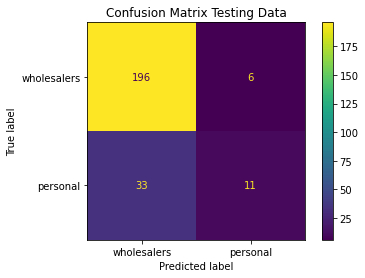

In [60]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# initiating the model
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model with the training data
knn.fit(X_train, y_train)

# predicting using testing data
y_pred = knn.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix for K-NN on tessnting data
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['wholesalers','personal'])
cmd.plot()
cmd.ax_.set_title('Confusion Matrix Testing Data')

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       607
           1       0.73      0.45      0.56       130

    accuracy                           0.87       737
   macro avg       0.81      0.71      0.74       737
weighted avg       0.86      0.87      0.86       737



Text(0.5, 1.0, 'Confusion Matrix Training Data')

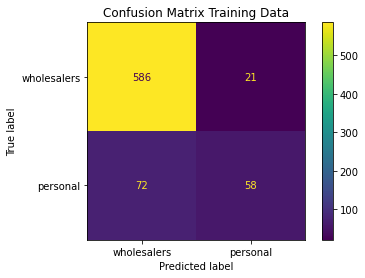

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicting using training data
y_pred = knn.predict(X_train)

# Printing the classification report
print(classification_report(y_train, y_pred))

# Confusion matrix for K-NN on training data
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['wholesalers','personal'])
cmd.plot()
cmd.ax_.set_title('Confusion Matrix Training Data')

In [62]:
# Predicting unclassified data with K-NN
new_pred_knn = knn.predict(notlabelled_flora_data_clean)

# saving the predicted results as dataframe
type_of_client_pred_knn = pd.DataFrame(new_pred_knn)

# reviewing the classification
type_of_client_pred_knn.value_counts() # 1 - Personal / 0 - Wholesaler 

0    2549
1     567
dtype: int64

 <h3> Model Development



Number of Neighbors: 1
Train Accuracy: 1.0
Test Accuracy: 0.8
Difference of Accuracy: 0.2
     
Number of Neighbors: 2
Train Accuracy: 0.88
Test Accuracy: 0.82
Difference of Accuracy: 0.06
     
Number of Neighbors: 3
Train Accuracy: 0.89
Test Accuracy: 0.83
Difference of Accuracy: 0.06
     
Number of Neighbors: 4
Train Accuracy: 0.88
Test Accuracy: 0.85
Difference of Accuracy: 0.03
     
Number of Neighbors: 5
Train Accuracy: 0.88
Test Accuracy: 0.85
Difference of Accuracy: 0.03
     
Number of Neighbors: 6
Train Accuracy: 0.88
Test Accuracy: 0.84
Difference of Accuracy: 0.03
     
Number of Neighbors: 7
Train Accuracy: 0.88
Test Accuracy: 0.85
Difference of Accuracy: 0.04
     
Number of Neighbors: 8
Train Accuracy: 0.88
Test Accuracy: 0.85
Difference of Accuracy: 0.03
     
Number of Neighbors: 9
Train Accuracy: 0.87
Test Accuracy: 0.84
Difference of Accuracy: 0.03
     


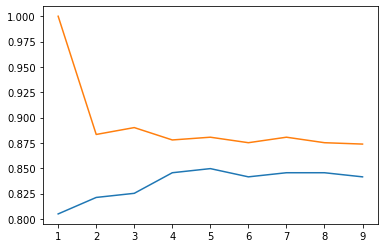

In [63]:
# Testing for different neighbors
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Function to iterate all the number of neighbors
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print("Number of Neighbors:", k)
    print("Train Accuracy:",train_accuracy[i].round(decimals=2))
    print("Test Accuracy:",test_accuracy[i].round(decimals=2))
    print("Difference of Accuracy:", (train_accuracy[i] - 
                                     test_accuracy[i]).round(decimals=2))
    print("     ")

# Plotting the graph
plt.plot(neighbors, test_accuracy, label = 'Testing accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.show()

For Knn model, selected 9 neighbors to avoid overfitting

In [64]:
########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [65]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [71]:
#importing new dataset
customer_df = pd.read_csv('__Storage/FloraUltimateEdition.csv')
customer_df.head(n = 5)

,customer_id,type_of_client,education,marital_status,race,relationship_in_household,age,avg_quantity,number_of_order,avg_total_order_amount,Quantity,Revenue,1st_qtr_qty,2nd_qtr_qty,3rd_qtr_qty,4th_qtr_qty,1st_qtr_rev,2nd_qtr_rev,3rd_qtr_rev,4th_qtr_rev,type_of_sale,loyalty,occupation_type,Country,employment_type
0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.2203,109674,8.122998,133818.0,890784.20,28827.0,-7733,32819.0,79905,141409.56,135873.82,169444.79,444056.03,No,373,NaN,NaN,NaN
1,183582,NaN,HS-grad,Married-civ-spouse,White,Husband,28.0,2.6378,127,7.552126,335.0,959.12,108.0,0,169.0,58,298.34,0.00,485.64,175.14,No,241,Machine-op-inspct,United-States,Private
2,1765943,NaN,HS-grad,Married-civ-spouse,Other,Husband,26.0,3.2000,5,11.260000,16.0,56.30,16.0,0,0.0,0,56.30,0.00,0.00,0.00,No,0,Adm-clerical,United-States,Federal-gov
3,3173172,Personal,Masters,Never-married,White,Own-child,26.0,1.0000,3,2.183333,3.0,6.55,0.0,0,0.0,3,0.00,0.00,0.00,6.55,No,21,Exec-managerial,United-States,Private
4,9046402,NaN,Bachelors,Married-civ-spouse,Black,Husband,44.0,1.3404,47,3.129574,63.0,147.09,0.0,0,0.0,63,0.00,0.00,0.00,147.09,No,0,Prof-specialty,United-States,Private


In [72]:
customer_df.describe().round(decimals = 2)

,customer_id,age,avg_quantity,number_of_order,avg_total_order_amount,Quantity,Revenue,1st_qtr_qty,2nd_qtr_qty,3rd_qtr_qty,4th_qtr_qty,1st_qtr_rev,2nd_qtr_rev,3rd_qtr_rev,4th_qtr_rev,loyalty
count,4.099000e+03,4098.00,4097.00,4099.00,4097.00,4097.00,4097.00,4098.00,4099.00,4098.00,4099.0,4098.00,4099.00,4098.00,4099.00,4099.00
mean,2.147371e+09,38.89,12.15,108.53,17.26,535.81,1205.74,97.71,105.33,139.06,193.5,207.95,245.74,284.70,466.89,127.10
std,1.261468e+09,13.76,97.98,1723.14,132.22,3438.34,14773.52,744.68,669.90,948.58,1588.5,2391.73,2438.35,2989.19,7218.33,131.01
min,0.000000e+00,17.00,-144.00,1.00,-4287.63,-904.00,-4287.63,-669.00,-7733.00,-394.00,-904.0,-1520.11,-1591.20,-4287.63,-2282.17,0.00
25%,1.024425e+09,28.00,2.35,15.00,5.66,52.00,142.50,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,2.134300e+09,37.00,3.11,38.00,9.05,133.00,346.57,0.00,0.00,0.00,34.0,0.00,0.00,0.00,98.83,83.00
75%,3.258602e+09,48.00,4.12,90.00,12.73,340.00,808.39,52.75,70.00,84.00,127.0,145.15,200.96,215.62,319.77,246.00
max,4.294838e+09,91.00,4300.00,109674.00,3861.00,133818.00,890784.20,28827.00,27446.00,32819.00,79905.0,141409.56,135873.82,169444.79,444056.03,373.00


In [73]:
# use purchase behaviors and customer_id
continuous = customer_df.loc[ : , ('age','loyalty','avg_quantity','avg_total_order_amount','number_of_order')]

continuous=continuous.fillna(0)

# applying the unsupervised_scaler function
continuous_scaled = unsupervised_scaler(df = continuous)


# checking pre- and post-scaling variance
print(np.var(continuous))
print(np.var(continuous_scaled))

age                       1.896578e+02
loyalty                   1.715961e+04
avg_quantity              9.593034e+03
avg_total_order_amount    1.746977e+04
number_of_order           2.968487e+06
dtype: float64
age                       1.0
loyalty                   1.0
avg_quantity              1.0
avg_total_order_amount    1.0
number_of_order           1.0
dtype: float64


In [74]:
continuous.corr(method = 'pearson').round(decimals = 2)

,age,loyalty,avg_quantity,avg_total_order_amount,number_of_order
age,1.00,-0.01,0.02,-0.00,-0.04
loyalty,-0.01,1.00,-0.01,0.00,0.07
avg_quantity,0.02,-0.01,1.00,0.59,-0.00
avg_total_order_amount,-0.00,0.00,0.59,1.00,-0.00
number_of_order,-0.04,0.07,-0.00,-0.00,1.00


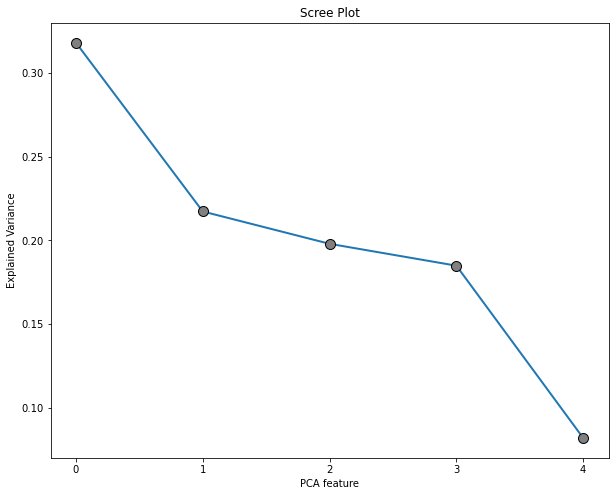

In [75]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(continuous_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

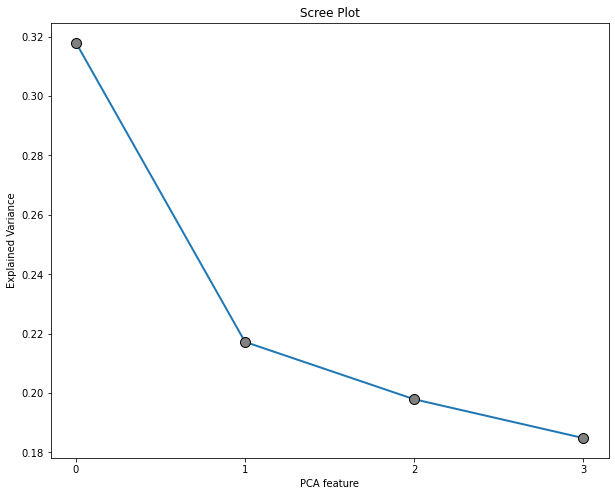

In [76]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 4,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(continuous_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

 <h3> PCA
 
    
    
The sedimentation graph shows that the 4 (0, 1, 2, 3) principal components explain more than 90% of the variance of our model.
    The component age, explain 32% of the variance of the model. After we have loyalty and with a 22 % , followed by  average quantity with 20%  and  average total order amount with 19% . So Our PCA is balanced , anyways Average age is the component that explain 32% of the total variance

Component 4 , that appears in the first Scree plot is not considered as it explain less than 5% of the variance
For our analysis we are selecting the 4 mentioned components

In [77]:
pca.components_

array([[ 0.02257037, -0.01025871,  0.70711381,  0.70656433, -0.01192675],
       [-0.42552908,  0.59372651,  0.00390423,  0.02982303,  0.68228233],
       [ 0.84282978,  0.53425116,  0.00215359, -0.02028137,  0.06162543],
       [ 0.32760132, -0.60148683,  0.00916166, -0.01607157,  0.72838776]])

In [78]:
pca.explained_variance_ratio_.sum()

0.9179676548750042

In [79]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(continuous_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}""")


MAX Components Factor Loadings
------------------------------
                           0     1     2     3
age                     0.02 -0.43  0.84  0.33
loyalty                -0.01  0.59  0.53 -0.60
avg_quantity            0.71  0.00  0.00  0.01
avg_total_order_amount  0.71  0.03 -0.02 -0.02
number_of_order        -0.01  0.68  0.06  0.73


In [80]:
# naming each principal component #### To be changed
factor_loadings.columns = ['one_time_highspender_wholesaler',# high quantity, high price, low frquency of visit
                           'young_value_buyers',# younger,higher_quantity, high loyalty,  
                           'oldtimer_loyal_customer',    # older people,high loyalty, standard order, quantity, budget spending
                           'standard_buyers '] # young people, many orders, low loyalty
#                           

# checking the result
factor_loadings

,one_time_highspender_wholesaler,young_value_buyers,oldtimer_loyal_customer,standard_buyers
age,0.022570,-0.425529,0.842830,0.327601
loyalty,-0.010259,0.593727,0.534251,-0.601487
avg_quantity,0.707114,0.003904,0.002154,0.009162
avg_total_order_amount,0.706564,0.029823,-0.020281,-0.016072
number_of_order,-0.011927,0.682282,0.061625,0.728388


In [81]:
# analyzing factor strengths per customer
factor_loadings_df = pca.transform(continuous_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings_df)


# renaming columns
factor_loadings_df.columns = factor_loadings.columns


# checking the results
factor_loadings_df.head(n = 5)

,one_time_highspender_wholesaler,young_value_buyers,oldtimer_loyal_customer,standard_buyers
0,-0.969117,45.701418,2.543528,44.266159
1,-0.147384,0.857142,-0.199349,-0.773686
2,-0.107063,-0.220833,-1.309569,0.233360
3,-0.173098,-0.128579,-1.222649,0.136987
4,-0.134742,-0.762291,-0.205252,0.680117


In [82]:
# checking variance amongst clusters
np.var(factor_loadings_df)

one_time_highspender_wholesaler    1.589703
young_value_buyers                 1.086133
oldtimer_loyal_customer            0.989658
standard_buyers                    0.924344
dtype: float64

In [83]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

one_time_highspender_wholesaler    1.589703
young_value_buyers                 1.086133
oldtimer_loyal_customer            0.989658
standard_buyers                    0.924344
dtype: float64 


one_time_highspender_wholesaler    1.0
young_value_buyers                 1.0
oldtimer_loyal_customer            1.0
standard_buyers                    1.0
dtype: float64


In [84]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    1622
0    1413
3    1063
2       1
Name: Cluster, dtype: int64


In [85]:
customers_kmeans_pca.value_counts()

Cluster
1          1622
0          1413
3          1063
2             1
dtype: int64

In [86]:
customer_df.columns

Index(['customer_id', 'type_of_client', 'education', 'marital_status', 'race', 'relationship_in_household', 'age', 'avg_quantity', 'number_of_order', 'avg_total_order_amount', 'Quantity', 'Revenue', '1st_qtr_qty', '2nd_qtr_qty', '3rd_qtr_qty', '4th_qtr_qty', '1st_qtr_rev', '2nd_qtr_rev', '3rd_qtr_rev', '4th_qtr_rev', 'type_of_sale', 'loyalty', 'occupation_type', 'Country', 'employment_type'], dtype='object')

In [87]:
# concatenating categorical information with pca patterns
final_df = pd.concat([customer_df.loc[ : , ['customer_id', 'type_of_client', 'education', 'marital_status', 'race', 'relationship_in_household', 'age', 'avg_quantity', 'number_of_order', 'avg_total_order_amount', 'Quantity', 'Revenue', '1st_qtr_qty', '2nd_qtr_qty', '3rd_qtr_qty', '4th_qtr_qty', '1st_qtr_rev', '2nd_qtr_rev', '3rd_qtr_rev', '4th_qtr_rev', 'type_of_sale', 'loyalty', 'occupation_type', 'Country', 'employment_type']],
                                            factor_loadings_df.round(decimals = 2),
                                            customers_kmeans_pca],
                                            axis = 1)


# renaming columns
# final_df.columns = ['customer_id', 'type_of_client', 'education',
#                     'marital_status','occupation_type', 'race',
#                     'relationship_in_household', 'Country', 'employment_type', 'type_of_sale',
#                     'one_time_highspender_wholesaler', 'young_value_buyers', 'oldtimer_loyal_customer',   
#                     'standard_buyers', 'cluster_kmeans']

# converting to a DataFrame
final_df = pd.DataFrame(final_df)


# checking the results
final_df.head(n = 12)

,customer_id,type_of_client,education,marital_status,race,relationship_in_household,age,avg_quantity,number_of_order,avg_total_order_amount,Quantity,Revenue,1st_qtr_qty,2nd_qtr_qty,3rd_qtr_qty,4th_qtr_qty,1st_qtr_rev,2nd_qtr_rev,3rd_qtr_rev,4th_qtr_rev,type_of_sale,loyalty,occupation_type,Country,employment_type,one_time_highspender_wholesaler,young_value_buyers,oldtimer_loyal_customer,standard_buyers,Cluster
0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.2203,109674,8.122998,133818.0,890784.20,28827.0,-7733,32819.0,79905,141409.56,135873.82,169444.79,444056.03,No,373,NaN,NaN,NaN,-0.97,45.70,2.54,44.27,2
1,183582,NaN,HS-grad,Married-civ-spouse,White,Husband,28.0,2.6378,127,7.552126,335.0,959.12,108.0,0,169.0,58,298.34,0.00,485.64,175.14,No,241,Machine-op-inspct,United-States,Private,-0.15,0.86,-0.20,-0.77,0
2,1765943,NaN,HS-grad,Married-civ-spouse,Other,Husband,26.0,3.2000,5,11.260000,16.0,56.30,16.0,0,0.0,0,56.30,0.00,0.00,0.00,No,0,Adm-clerical,United-States,Federal-gov,-0.11,-0.22,-1.31,0.23,1
3,3173172,Personal,Masters,Never-married,White,Own-child,26.0,1.0000,3,2.183333,3.0,6.55,0.0,0,0.0,3,0.00,0.00,0.00,6.55,No,21,Exec-managerial,United-States,Private,-0.17,-0.13,-1.22,0.14,1
4,9046402,NaN,Bachelors,Married-civ-spouse,Black,Husband,44.0,1.3404,47,3.129574,63.0,147.09,0.0,0,0.0,63,0.00,0.00,0.00,147.09,No,0,Prof-specialty,United-States,Private,-0.13,-0.76,-0.21,0.68,3
5,10304995,NaN,HS-grad,Married-civ-spouse,White,Husband,52.0,3.5000,18,6.628889,63.0,119.32,0.0,0,63.0,0,0.00,0.00,119.32,0.00,No,0,Exec-managerial,United-States,Private,-0.09,-1.02,0.28,0.86,3
6,10327107,NaN,Some-college,Divorced,White,Not-in-family,49.0,2.9789,142,9.038592,423.0,1283.48,0.0,0,335.0,88,0.00,0.00,1051.40,232.08,No,142,Prof-specialty,United-States,Private,-0.09,-0.23,0.68,0.19,3
7,10976223,NaN,Prof-school,Never-married,White,Not-in-family,40.0,2.9205,88,6.069091,257.0,534.08,257.0,0,0.0,0,534.08,0.00,0.00,0.00,No,48,Exec-managerial,Cuba,Private,-0.12,-0.40,-0.25,0.38,1
8,12065807,Wholesaler,HS-grad,Married-civ-spouse,White,Husband,51.0,4.8772,171,12.249181,834.0,2094.61,117.0,376,86.0,255,299.72,701.54,259.86,833.49,No,328,Transport-moving,United-States,Federal-gov,-0.08,0.56,1.56,-0.61,0
9,13433438,NaN,HS-grad,Widowed,White,Own-child,36.0,2.6250,8,12.331250,21.0,98.65,21.0,0,0.0,0,98.65,0.00,0.00,0.00,No,0,Sales,United-States,Private,-0.09,-0.53,-0.70,0.47,1


In [88]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['one_time_highspender_wholesaler', 'young_value_buyers', 'oldtimer_loyal_customer',   
                    'standard_buyers',]


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,one_time_highspender_wholesaler,young_value_buyers,oldtimer_loyal_customer,standard_buyers
0,-0.02,0.77,0.46,-0.79
1,0.01,-0.20,-0.91,0.22
2,-0.77,43.85,2.56,46.04
3,0.02,-0.77,0.77,0.67


In [89]:
final_df['Cluster'].value_counts()

1    1622
0    1413
3    1063
2       1
Name: Cluster, dtype: int64

In [90]:
# dynamic string with value counts for each demographic (cluster 1)
for i in range(0,4):
    print(f"""\
 -----------
| Cluster {i} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == i]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 0 , :].to_string(dtype = False, name = False)}


occupation
-------
{final_df.loc[ : , "occupation_type"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         
employment_type
-------
{final_df.loc[ : , "employment_type"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}         


Marital Status
-------------

{final_df.loc[ : , "marital_status"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}


race
-----
{final_df.loc[ : , "race"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}



Relationship_in_household
------------------------
{final_df.loc[ : , "relationship_in_household"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}


 
  
education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
    """)

 -----------
| Cluster 0 |
 -----------

Proportion of Observations
--------------------------
0.34


Centroids
---------
one_time_highspender_wholesaler   -0.02
young_value_buyers                 0.77
oldtimer_loyal_customer            0.46
standard_buyers                   -0.79


occupation
-------
Adm-clerical         0.13
Craft-repair         0.12
Exec-managerial      0.12
Farming-fishing      0.03
Handlers-cleaners    0.05
Machine-op-inspct    0.06
Other-service        0.10
Priv-house-serv      0.00
Prof-specialty       0.12
Protective-serv      0.02
Sales                0.16
Tech-support         0.03
Transport-moving     0.04
         
employment_type
-------
Federal-gov         0.04
Local-gov           0.06
Private             0.76
Self-emp-inc        0.04
Self-emp-not-inc    0.07
State-gov           0.04         


Marital Status
-------------

Divorced                 0.13
Married-AF-spouse        0.00
Married-civ-spouse       0.45
Married-spouse-absent    0.02
Never-married 

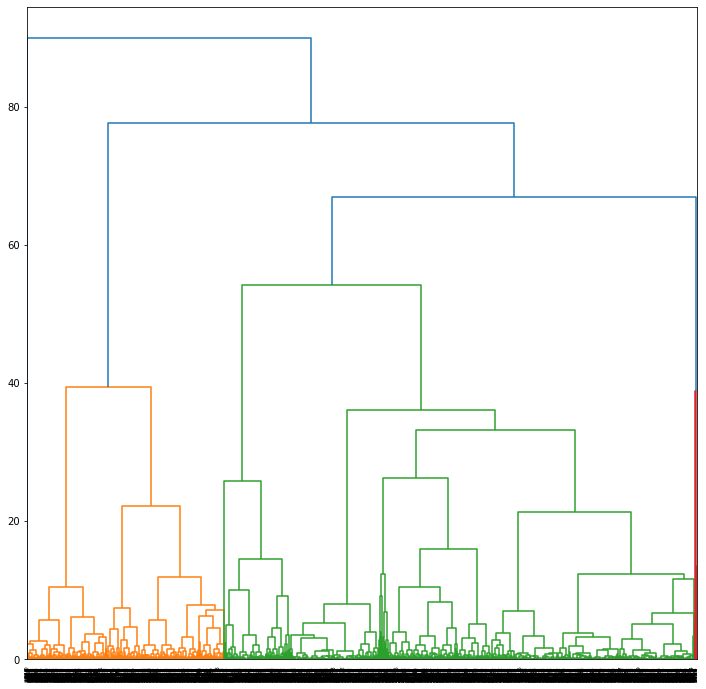

In [92]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()